In [9]:
import pandas as pd

import networkx as nx

import numpy as np

import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('data/user-books.csv', )


In [11]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


In [12]:
# Nodes are books, edges are order of read books
sorted_df = df=df.sort_values(by=['user_id','date_created'])


In [13]:
# Build edges list
sorted_df["source"] = sorted_df["chapter"] + sorted_df["book"]
sorted_df["target"]= sorted_df["source"].shift(-1)  
sorted_df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1,chapter-8bhargava,chapter-8fain3
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1,chapter-8fain3,chapter-1ramamurthy
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1,chapter-1ramamurthy,chapter-1thomas
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1,chapter-1thomas,about-this-bookprasanna
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0,about-this-bookprasanna,chapter-4mcnamara


In [14]:
# Remove user switch (if next row has a different user_id)
sorted_df["user_check"] = sorted_df["user_id"].shift(-1)
sorted_df['keep_drop'] = np.where((sorted_df['user_check'] == sorted_df['user_id']), sorted_df['user_id'], np.nan)
sorted_df = sorted_df.dropna(subset=["keep_drop"])


In [15]:
G = nx.from_pandas_edgelist(sorted_df, "source", "target", create_using=nx.DiGraph)


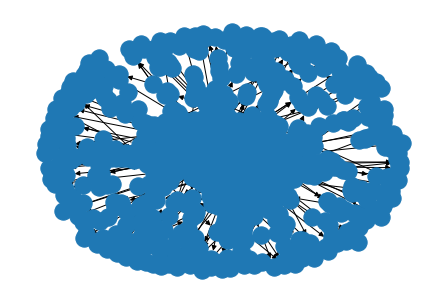

In [16]:
nx.draw(G)


In [18]:
sorted_df.to_csv('network.csv', index=False)